**cellular automaton** is a model of a world with very simple physics.  "Cellular" means that the space is divided into discrete chunks.  An "automaton" is a machine that performs computations--could be a real machine, but more often a mathematical abstraction or computer simulation.

most CAs are **deterministic**, which means they do not have any random elements.

##Steven Wolfram - 1d CAs
diminsion refers to cells having "neighbors"

* **Finite Sequence** a finite number of cells arranged in a row.  All cells except the first and last have two neighbors

*  **Ring** - a finite number of cells arranged in a ring.  All have two neighbors.

* **infinite sequence** and infinite number of cells in a row.

Rules that determine how a system evolves in time are based on "neighborhoods"--the set of cells that determines the state of a given cell.

in Wolfram 1d CAs, rule is a binary number indicating outcome of center cell of 3 tuple in next timestep.  Each cell has 'triangle of influence'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class CA(object):
    
    def __init__(self, rule, n=100, ratio=2):
        """
        *  rule is an integer between 0 and 255.  make table
        uses Wolfram's encoding to make a dictionary that maps
        from neighborhood states to cell states.
        
        * n is number of rows in the array--i.e. time steps
        * m is the number columns
        * next is the index of the next time step.
        """
        self.table = make_table(rule)
        self.n = n
        self.m = ratio*n + 1
        self.array = numpy.zeros((n, self.m), dtype=np.int8)
        self.next = 0
        
    def single_start(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m/2] = 1
        self.next += 1
    
    def step(self):
        """looks up state of current row from state of previous row"""
        i = self.next
        self.next += 1
        
        a = self.array
        t = self.table
        for j in xrange(1, self.m-1):
            a[i, j] = t[tuple(a[i-1, j-1:j+2])]

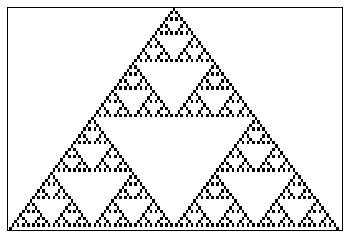

In [4]:
import CADrawer
from CA import CA

n=65
rule=18

ca = CA(rule, n, ratio=2)
ca.start_single()
ca.loop(n-1)

drawer = CADrawer.PyplotDrawer()
drawer.draw(ca)
drawer.show()

In [50]:
class CircularCA(CA):
    
    def __init__(self, rule, n=100, ratio=2):
        """
        *  rule is an integer between 0 and 255.  make table
        uses Wolfram's encoding to make a dictionary that maps
        from neighborhood states to cell states.
        
        * n is number of rows in the array--i.e. time steps
        * m is the number columns
        * next is the index of the next time step.
        """
        self.table = CA.make_table(self, rule)
        self.n = n
        self.m = ratio*n + 1 + 2 #add two extra ghost cells
        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0
        
    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, 0] = 1
        self.next += 1
    
    def step(self):
        """looks up state of current row from state of previous row"""
        i = self.next
        self.next += 1
        
        a = self.array
        t = self.table
        
        #ghost cells
        a[i,0] = t[(a[i-1, self.m-2], 
                    a[i-1, 0], 
                    a[i-1, 1])]
        a[i, self.m-1]= a[i, 0]
        
        for j in xrange(1, self.m-1):
            a[i, j] = t[tuple(a[i-1, j-1:j+2])]

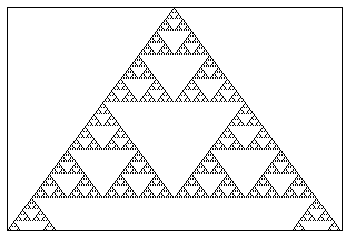

In [89]:
def draw_rule(rule, n=150, circular=False, random=False):
    if circular:
        ca = CircularCA(rule, n)
    else:
        ca = CA(rule, n)
    if random:
        ca.start_random()
    else:
        ca.start_single()
    ca.loop(n-1)

    drawer = CADrawer.PyplotDrawer()
    drawer.draw(ca)
    drawer.show()
draw_rule(18)

Four classes of CAs
1.  CAs that evolve from any starting condition to a uniform pattern.  See rule 0.
2.  Generates a simple pattern with nested structure that contains smaller versions of itself.  See rules 50 and 18
3.  CAs that Generate Randomness.  See rule 30.  A sample of the center is a **pseudo-random number generator**.
4.  ...(see below)

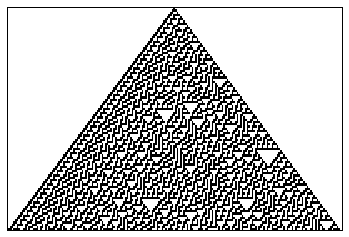

In [6]:
##rule 3
draw_rule(30, n=100)

##Exercise 6.2
<font color=red>
Note: I could not get this to work
</font>
1.  Linear congruential generators
2.  Test it with DieHarder
3.  Read documentation of python's random module.  Test with DieHarder
4.  Use center cell as random number generator and see how it does.

In [7]:
#1
def lin_cong_generator(seed=17, m=2**32, a=22695477, c=1):
    x = seed
    while True:
        x = (a*x + c) % m
        yield x

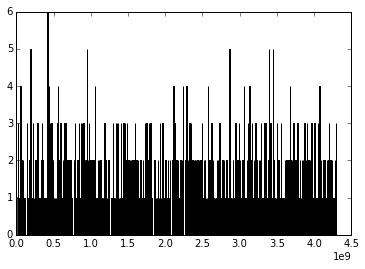

In [8]:
rand = lin_cong_generator()
rand_list = []
for i in xrange(1000):
    rand_list.append(rand.next())
fig, ax = plt.subplots()
ax.hist(rand_list, bins=1000)
plt.show()

In [9]:
!echo "110010111001001" | randomtests/testrandom.py -t 1 -x 


# monobitfrequencytest
0.796253414738


In [47]:
for i in range(8) + [10]:
    !randomtests/testrandom.py -t {i+1} -i rand.txt -j -x


# monobitfrequencytest
0.0
# blockfrequencytest
0.0
# runstest
2.0
# longestrunones10000
0.000274596941113
# binarymatrixranktest
5.8836752646e-12
# spectraltest
0.0
# nonoverlappingtemplatematchingtest
3.90322845107e-07
# overlappingtemplatematchingtest
9.13796746499e-07
# serialtest
[0.49896108745859735, 0.498530755295295]


In [87]:
def rule30generator(n=100):
    cca = CircularCA(30)
    cca.start_single()
    cca.loop(n-1)
    
    for i in xrange(n-1):
        yield cca.array[i+1, cca.m-1]

r30_list = []    
r30 = rule30generator()
for i in xrange(50):
    r30_list.append(r30.next())
print r30_list

[1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]


(cont'd) 4 classes of CAs
4.  **Turing complete** - i.e. can compute any computable function.  Universality.  See rule 110.
    * **spaceships** - forms that translate in space.  These spaceships can be thought of as signals that propagate on wires, and collisions between them as gates that compute logical operations like and and for.

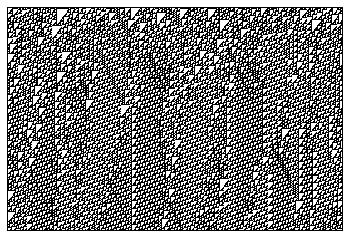

In [98]:
draw_rule(110, n=200, random=True, circular=True)

##Exercise 6.2

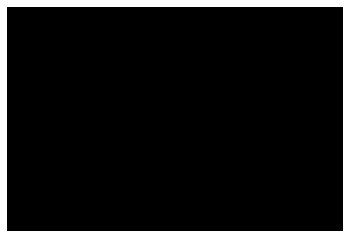

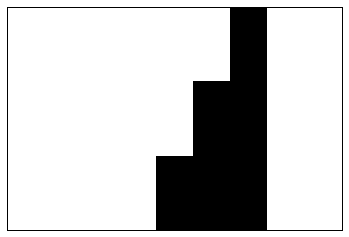

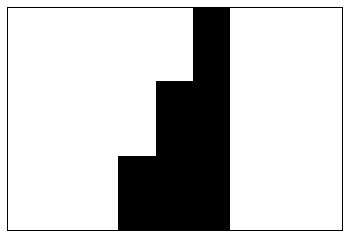

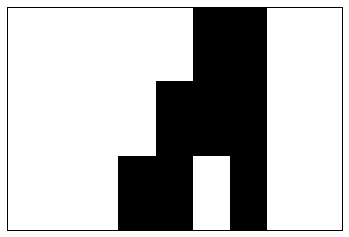

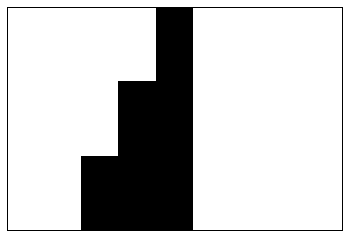

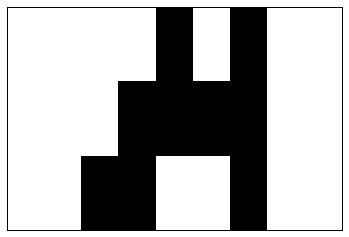

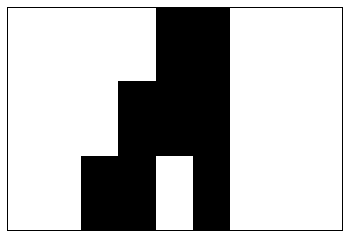

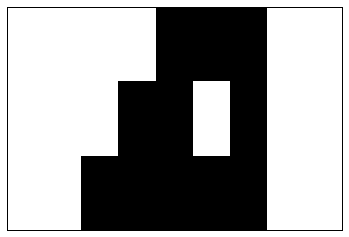

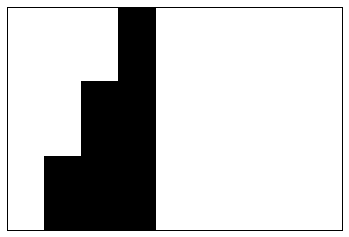

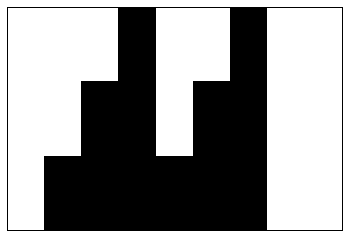

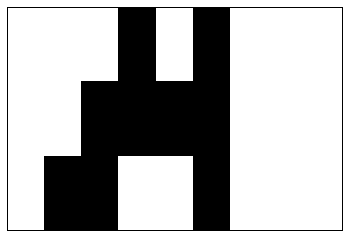

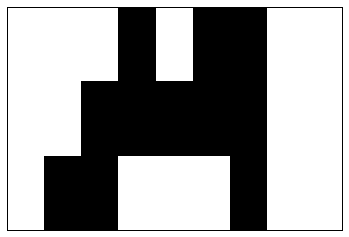

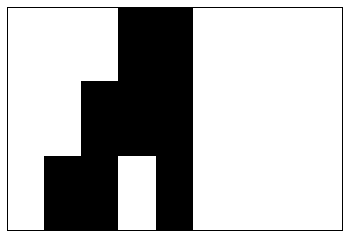

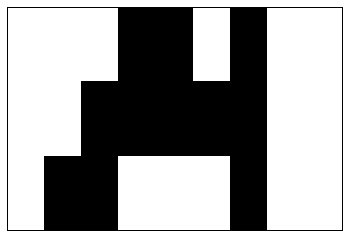

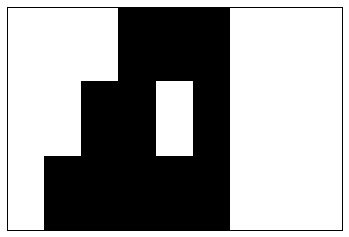

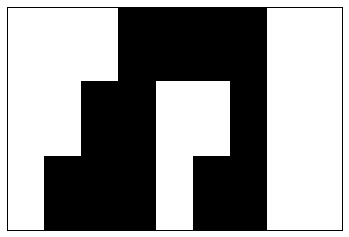

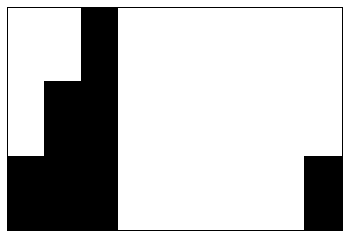

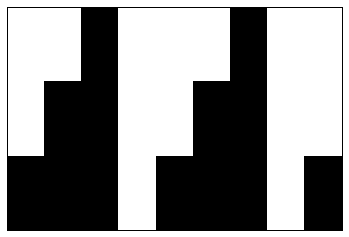

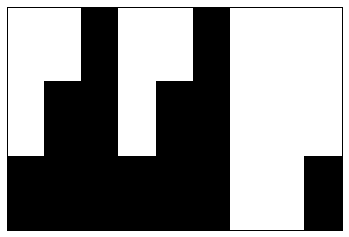

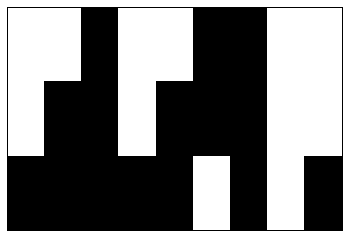

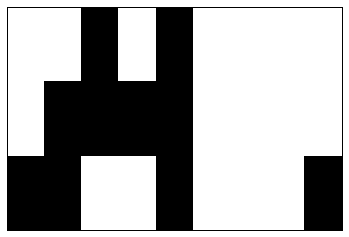

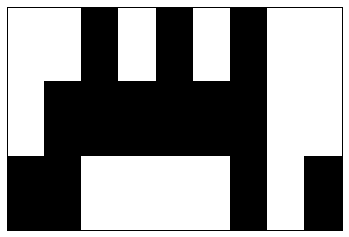

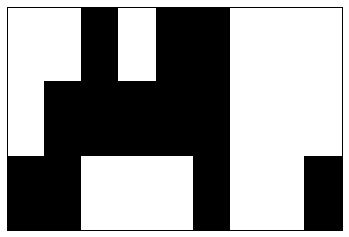

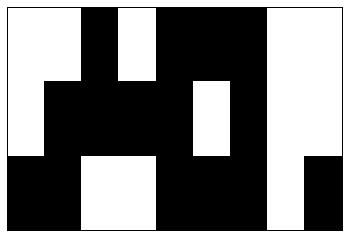

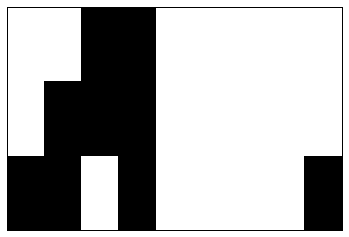

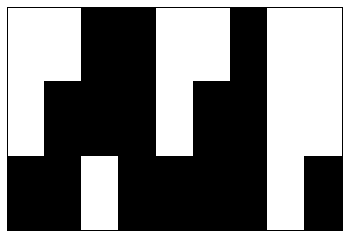

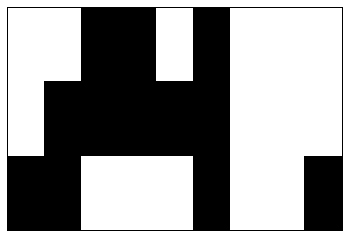

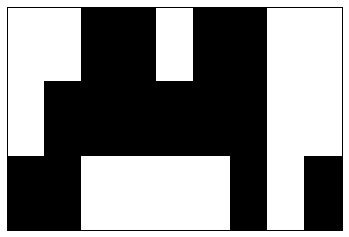

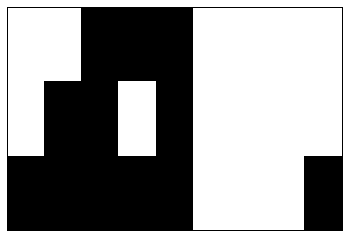

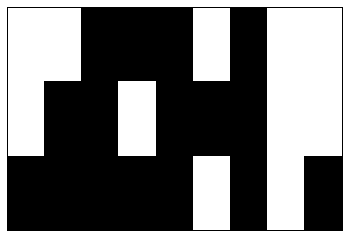

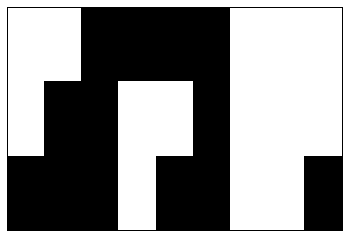

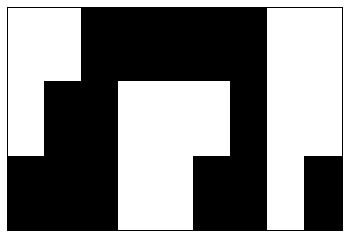

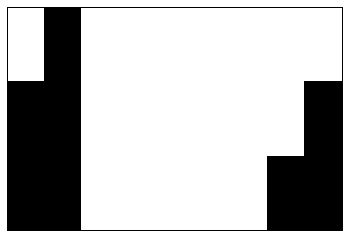

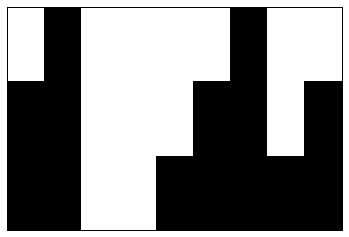

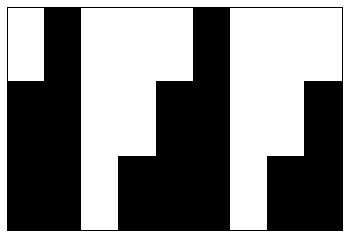

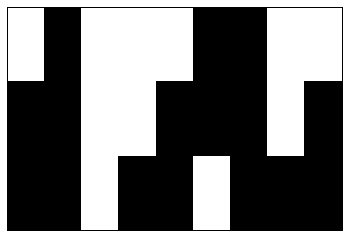

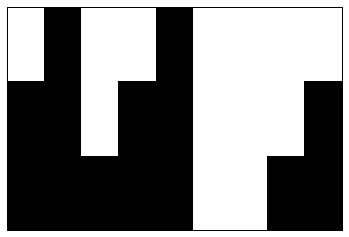

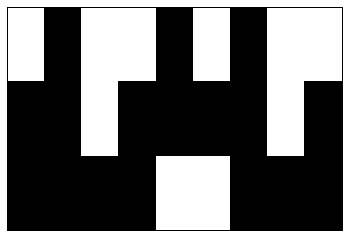

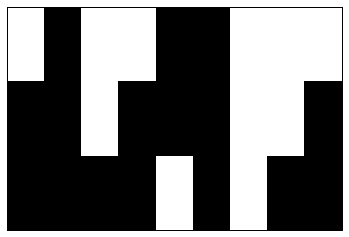

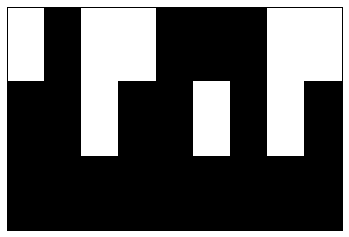

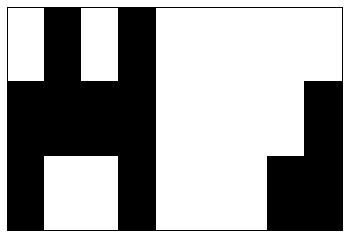

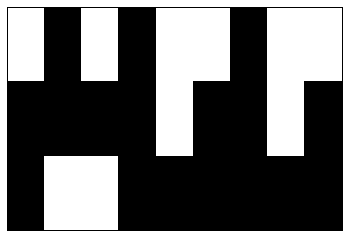

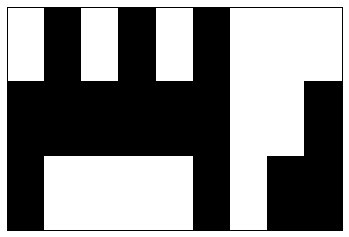

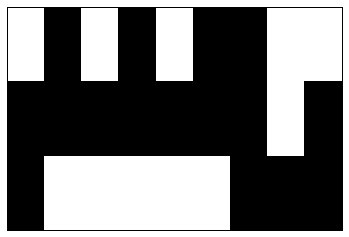

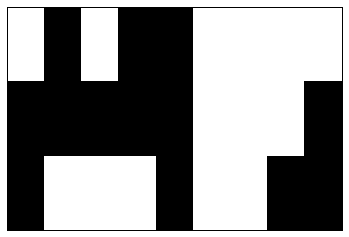

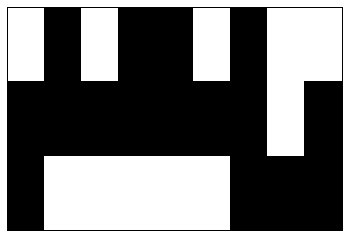

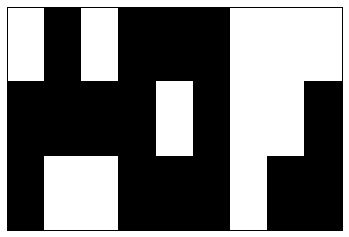

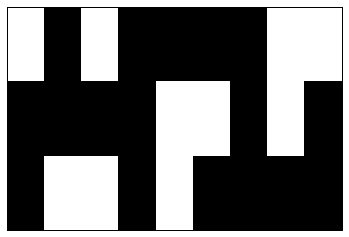

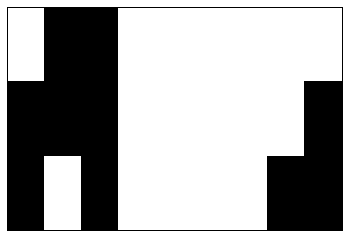

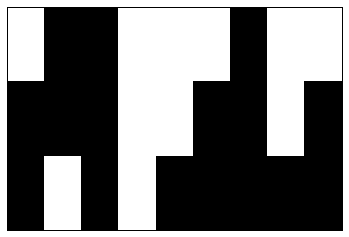

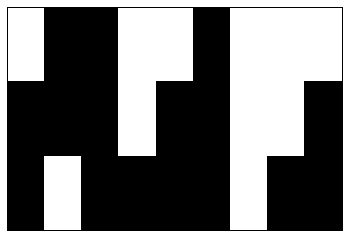

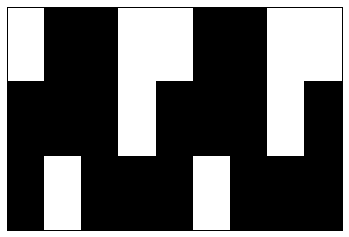

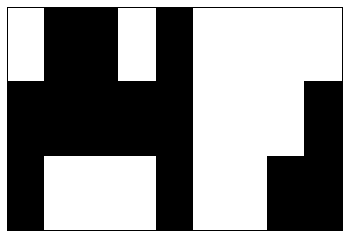

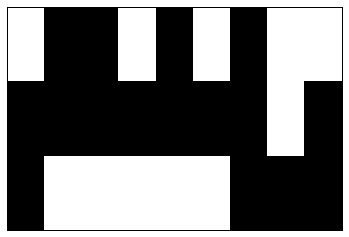

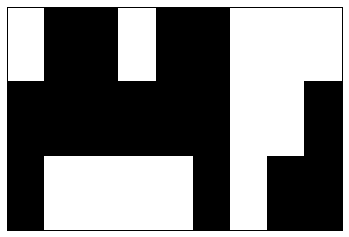

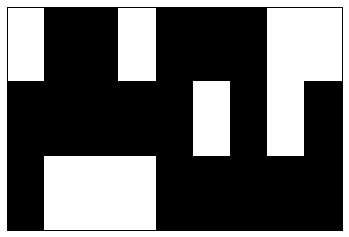

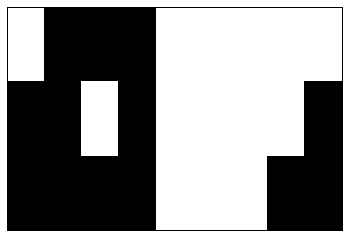

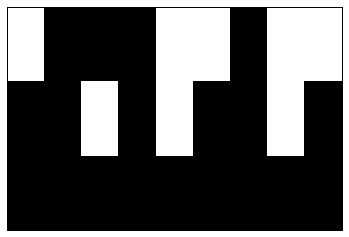

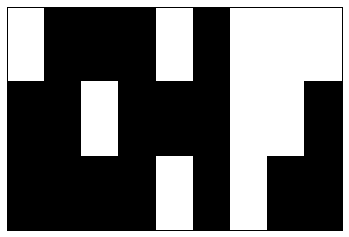

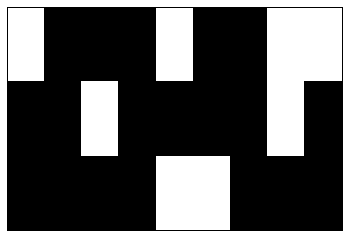

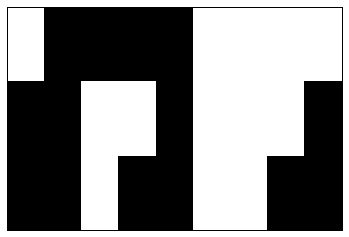

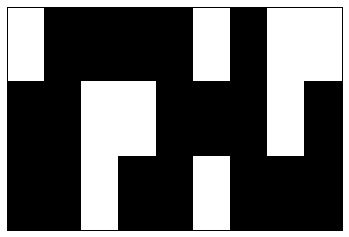

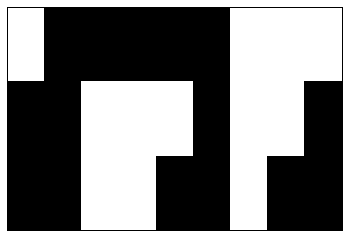

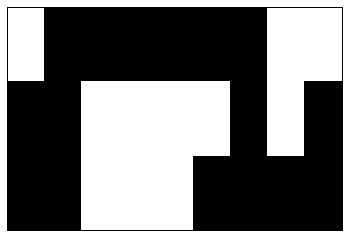

In [147]:
def _start_specific(self, perm):
    """permutation"""
    if len(perm) > len(self.array.T):
        raise ValueError('starting permutation must not have more columns than CA')
    for i, state in enumerate(perm):
        pos = self.m/2 - len(perm)/2 + i
        self.array[0, pos] = state
    self.next += 1
CA.start_specific = _start_specific
    
class Rule110Generator(object):
    
    def __init__(self, n=3, ratio=1, debug=False):
        self.perms = self.get_perms(n*ratio)
        
        self.CAs = {}
        for i, perm in enumerate(self.perms):
            current = CircularCA(110, n=n, ratio=ratio)
            current.start_specific(perm)
            current.loop(n-1)

            drawer = CADrawer.PyplotDrawer()
            drawer.draw(current)
            self.CAs[i] = current
            plt.figure()
            
            if debug and i>4:
                break
        drawer.show()
            
    def get_perms(self, m):
        perms = []
        for i in xrange(2**m):
            perms.append(binary(i, m))
        return perms
    

r = Rule110Generator()

##Exercise 6.3

In [128]:
(1,2,3)*3

(1, 2, 3, 1, 2, 3, 1, 2, 3)

In [28]:
class TuringTable(dict):
    """
    each state, tape symbol maps to a tuple with the following rows:
    * tape symbol
    * write symbol
    * move tape direction
    * next state
    """
    def __init__(self):
        self['a',0] = (1, 'r','b')
        self['a',1] = (1, 'l', 'c')
        self['b',0] = (1, 'l', 'a') 
        self['b',1] = (1, 'r', 'b')
        self['c',0] = (1, 'l', 'b')
        self['c',1] = (1, 'n', 'h')

class HaltException(Exception):
    """used to halt turing machine"""

class TM(CA):
    
    def __init__(self, table, m=100):
        self.m = m
        self.array = np.zeros((1, self.m), dtype=np.int8)
        self.next = 0
        
        #TM properties
        self.table = table
        self.head = self.m/2
        self.state = 'a'
        self.move = 'n'
        
        self.path = []
    
    def get_path(self):
        return self.path
        
    def step(self, debug=False):        
        a = self.array
        t = self.table
        
        transition = self.state, a[-1, self.head]
        write, move, state = t[transition]
        self.path.append((self.head, move))
        
        # write
        new_row = np.array(a[-1], copy=True)
        new_row[self.head] = write  
        self.array = np.vstack([a,new_row])
        
        # move
        if move=='r':
            self.head += 1
        elif move=='l':
            self.head -= 1
        
        # state
        if state=='h':
            raise HaltException('Computation Over')
        else:
            self.state = state
    
    def loop(self, debug=False):
        
        if debug: i=0
        while True:
            if debug:
                i+=1
                if i > 1000: break
            try:
                self.step()
            except HaltException:
                print "Compution complete"
                break

Compution complete


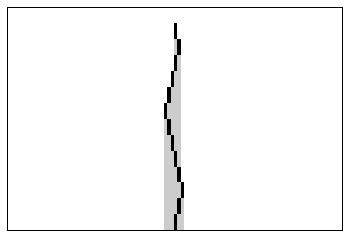

In [30]:
class TMDrawer(CADrawer.Drawer):
    
    def __init__(self):
        # we only need to import pyplot if a PyplotDrawer
        # gets instantiated
        global pyplot
        import matplotlib.pyplot as pyplot
        
    def draw(self, ca, start=0, end=None):
        """Draws the CA using pyplot.pcolor."""
        pyplot.gray()
        a = ca.get_array(start, end)
        rows, cols = a.shape

#         path_array = np.zeros(rows, cols)
        path = ca.get_path()
        for row, col_dxn in enumerate(path):
            col, dxn = col_dxn
            a[row+1, col] = 5
        
        # flipud puts the first row at the top; 
        # negating it makes the non-zero cells black.
        pyplot.pcolor(-np.flipud(a))
        pyplot.axis([0, cols, 0, rows])
        
        # empty lists draw no ticks
        pyplot.xticks([])
        pyplot.yticks([])

    def show(self):
        """display the pseudocolor representation of the CA"""
        pyplot.show()
        
bb = TuringTable()
tm = TM(bb)
tm.loop()
# print tm.path

tm_drawer = TMDrawer()
tm_drawer.draw(tm)
tm_drawer.show()

Why do we say that these cellular automata can compute anything?

the forms are neither completely stable nor completely chaotic.  Localized structures appear and interact in various complicated-looking ways.  This complicated-l